In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from keras import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

import glob
from google.colab import drive

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.style.use('seaborn-darkgrid')

seed = 7
np.random.seed(seed)

drive.mount("/content/drive/")
path = "/content/drive/My Drive/Colab Notebooks/NNDL/HW2/"

Mounted at /content/drive/


In [2]:
df = pd.read_csv(path + 'house prices.csv')

In [3]:
df = pd.read_csv(path + "house prices.csv").drop("Id",axis=1)
df = df[(df.count()>1000).loc[lambda x: x==True].index]

df = df[~(df.isna().any(axis=1))]

le = preprocessing.LabelEncoder()
obj_df = df.select_dtypes(include=['object']).copy()
for column in obj_df.columns:
  df[column] =le.fit_transform(df[column].values)

y=df.SalePrice
X = df.drop("SalePrice",axis=1)

scale = StandardScaler()
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [4]:
def model_4_Layer_Relu():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50,  activation='relu'))
    model.add(Dense(25,  activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer ='adam', loss = 'mean_squared_error',metrics =[metrics.mse,metrics.mae])
    return model
  
def model_3_Layer_Relu():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer ='adam', loss = 'mean_squared_error',metrics =[metrics.mse,metrics.mae])
    return model
  
def model_4_Layer_Linear():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='linear'))
    model.add(Dense(100, activation='linear'))
    model.add(Dense(50,  activation='linear'))
    model.add(Dense(25,  activation='linear'))
    model.add(Dense(1))
    model.compile(optimizer ='adam', loss = 'mean_squared_error',metrics =[metrics.mse,metrics.mae])
    return model
  
def model_3_Layer_Linear():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='linear'))
    model.add(Dense(30, activation='linear'))
    model.add(Dense(40, activation='linear'))
    model.add(Dense(1))
    model.compile(optimizer ='adam', loss = 'mean_squared_error',metrics =[metrics.mse,metrics.mae])
    return model

def model_4_Layer_Relu_MAE():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50,  activation='relu'))
    model.add(Dense(25,  activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer ='adam', loss="mean_absolute_error" ,metrics =[metrics.mse,metrics.mae])
    return model

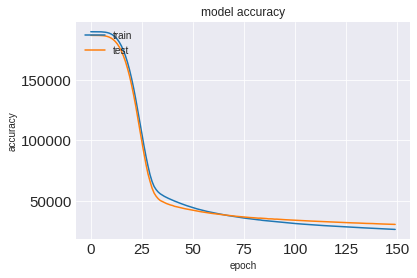

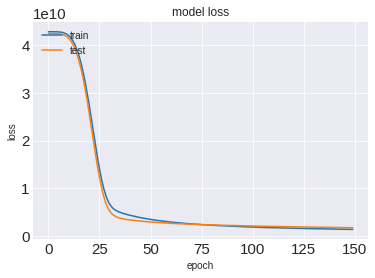

Final Mean Squared Error:  3802252244.5655046


In [ ]:
model3R = model_3_Layer_Relu()
history3R = model3R.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32,verbose=0)

plt.plot(history3R.history['mean_absolute_error'])
plt.plot(history3R.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history3R.history['loss'])
plt.plot(history3R.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction3R = model3R.predict(X_test)
mse3R = mean_squared_error(y_test,prediction3R)
print("Final Mean Squared Error: ",mse3R)

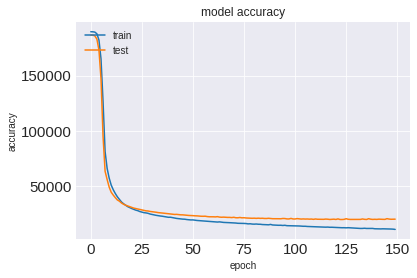

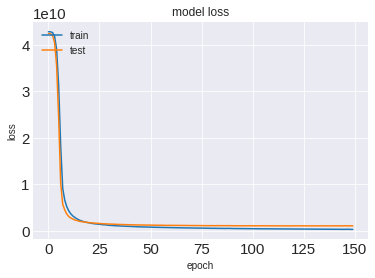

Final Mean Squared Error:  2946341188.735468


In [5]:
model4R = model_4_Layer_Relu()
history4R = model4R.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32,verbose=0)

plt.plot(history4R.history['mean_absolute_error'])
plt.plot(history4R.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history4R.history['loss'])
plt.plot(history4R.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction4R = model4R.predict(X_test)
mse4R = mean_squared_error(y_test,prediction4R)
print("Final Mean Squared Error: ",mse4R)

In [ ]:
pd.DataFrame(zip(prediction4R,y_test),columns=["pred","real"])

,pred,real
0,[139428.97],145000
1,[122848.32],118000
2,[114660.62],130000
3,[161400.44],140000
4,[266673.75],395000
...,...,...
214,[138582.75],152000
215,[217696.28],178000
216,[92456.61],140000
217,[318806.34],337000


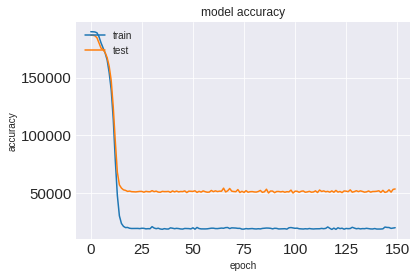

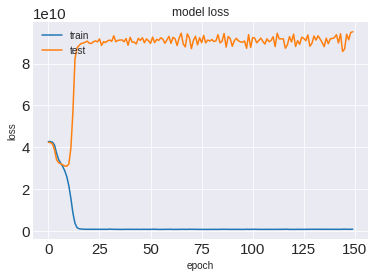

Final Mean Squared Error:  80399644613.52997


In [ ]:
model4L = model_4_Layer_Linear()
history4L = model4L.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32,verbose=0)

plt.plot(history4L.history['mean_absolute_error'])
plt.plot(history4L.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history4L.history['loss'])
plt.plot(history4L.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction4L = model4L.predict(X_test)
mse4L = mean_squared_error(y_test,prediction4L)
print("Final Mean Squared Error: ",mse4L)

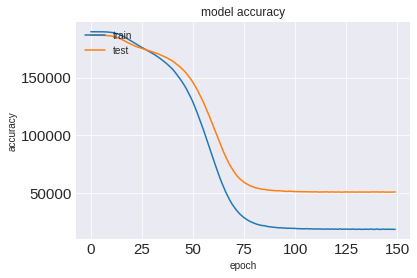

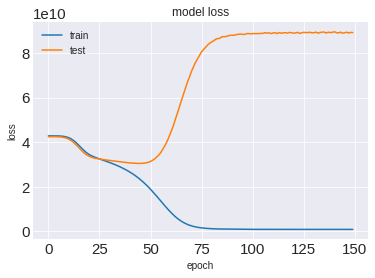

Final Mean Squared Error:  75081029993.47438


In [ ]:
model3L = model_3_Layer_Linear()
history3L = model3L.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32,verbose=0)

plt.plot(history3L.history['mean_absolute_error'])
plt.plot(history3L.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history3L.history['loss'])
plt.plot(history3L.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction3L = model3L.predict(X_test)
mse3L = mean_squared_error(y_test,prediction3L)
print("Final Mean Squared Error: ",mse3L)

Text(0.5, 1.0, 'Final MSE')

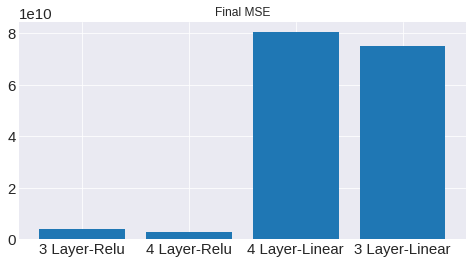

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(["3 Layer-Relu","4 Layer-Relu","4 Layer-Linear","3 Layer-Linear"],[mse3R,mse4R,mse4L,mse3L])
plt.title("Final MSE")

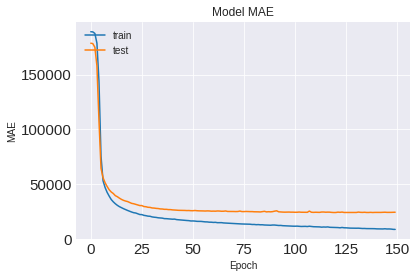

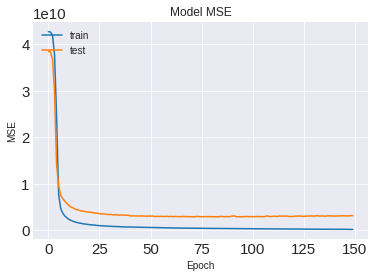

Final Mean Squared Error:  189604672.0
Final Mean Absolute Error:  8499.5322265625


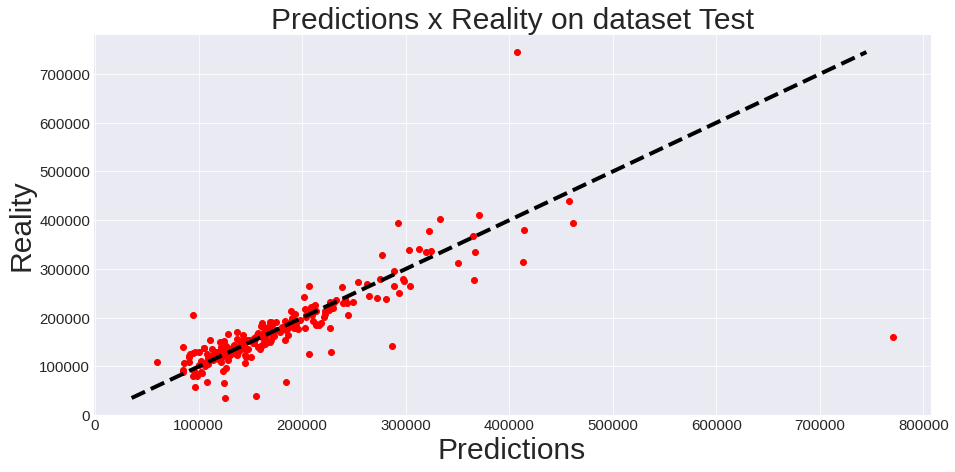

In [18]:
model4R2 = model_4_Layer_Relu()
history4R2 = model4R2.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=150, batch_size=32,verbose=0)

plt.plot(history4R2.history['mean_absolute_error'])
plt.plot(history4R2.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history4R2.history['mean_squared_error'])
plt.plot(history4R2.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction4R2 = model4R2.predict(X_test)

print("Final Mean Squared Error: ",history4R2.history['mean_squared_error'][-1])
print("Final Mean Absolute Error: ",history4R2.history['mean_absolute_error'][-1])

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(prediction4R2, y_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

240136336.0

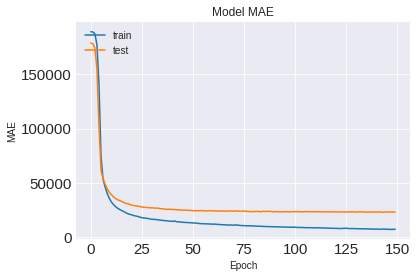

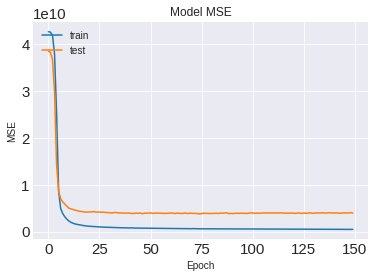

Final Mean Squared Error:  465844224.0
Final Mean Absolute Error:  7415.98876953125


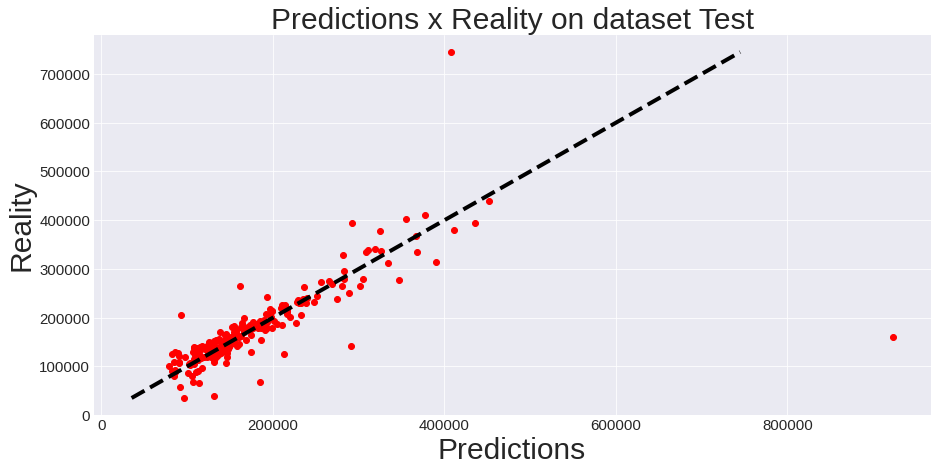

In [19]:
model4R_mae = model_4_Layer_Relu_MAE()
history4R_mae = model4R_mae.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=150, batch_size=32,verbose=0)

plt.plot(history4R_mae.history['mean_absolute_error'])
plt.plot(history4R_mae.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history4R_mae.history['mean_squared_error'])
plt.plot(history4R_mae.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction4R_mae = model4R_mae.predict(X_test)
print("Final Mean Squared Error: ",history4R_mae.history['mean_squared_error'][-1])
print("Final Mean Absolute Error: ",history4R_mae.history['mean_absolute_error'][-1])

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(prediction4R_mae, y_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()